## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_df = pd.merge(left= mouse_metadata, right = study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice.
total_mice = len(mouse_study_data_df["Mouse ID"].value_counts())
total_mice

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

has_duplicate = mouse_study_data_df.duplicated(["Mouse ID", "Timepoint"])
duplicate_mouseid = mouse_study_data_df.loc[has_duplicate, "Mouse ID"]

duplicate_mice = duplicate_mouseid.unique()
duplicate_mice


array(['g989'], dtype=object)

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouseid_df = duplicate_mouseid
all_duplicate_mouseid_df


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_df = mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == duplicate_mice), :]

# clean_df = mouse_study_data_df.drop(mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == duplicate_mice), :])

clean_df = mouse_study_data_df[mouse_study_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

# clean_mouse_study_df = mouse_study_data_df.drop_duplicates(mouse_study_data_df["Mouse ID"] == duplicate_mice, keep = False)
# clean_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [101]:
drug_regimen = [clean_df["Drug Regimen"].unique()]
drug_regimen

[array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
       dtype=object)]

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# ramicane_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Ramicane", :]

# mean_ramicane = np.mean(ramicane_df["Tumor Volume (mm3)"])
# median_ramicane = np.median(ramicane_df["Tumor Volume (mm3)"])
# var_ramicane = np.var(ramicane_df["Tumor Volume (mm3)"], ddof = 0)
# stdev_ramicane = np.std(ramicane_df["Tumor Volume (mm3)"], ddof = 0)
# sem_ramicane = st.sem(ramicane_df["Tumor Volume (mm3)"], ddof = 0)


# capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin", :]

# mean_capomulin = np.mean(capomulin_df["Tumor Volume (mm3)"])
# median_capomulin = np.median(capomulin_df["Tumor Volume (mm3)"])
# var_capomulin= np.var(capomulin_df["Tumor Volume (mm3)"], ddof = 0)
# stdev_capomulin = np.std(capomulin_df["Tumor Volume (mm3)"], ddof = 0)
# sem_capomulin = st.sem(capomulin_df["Tumor Volume (mm3)"], ddof = 0)


# infubinol_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Infubinol", :]

# mean_infubinol = np.mean(infubinol_df["Tumor Volume (mm3)"])
# median_infubinol = np.median(infubinol_df["Tumor Volume (mm3)"])
# var_infubinol= np.var(infubinol_df["Tumor Volume (mm3)"], ddof = 0)
# stdev_infubinol = np.std(infubinol_df["Tumor Volume (mm3)"], ddof = 0)
# sem_infubinol = st.sem(infubinol_df["Tumor Volume (mm3)"], ddof = 0)


placebo_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Placebo", :]

# mean_placebo = np.mean(placebo_df["Tumor Volume (mm3)"])
# median_placebo = np.median(placebo_df["Tumor Volume (mm3)"])
# var_placebo= np.var(placebo_df["Tumor Volume (mm3)"], ddof = 0)
# stdev_placebo = np.std(placebo_df["Tumor Volume (mm3)"], ddof = 0)
# sem_placebo = st.sem(placebo_df["Tumor Volume (mm3)"], ddof = 0)


# summary_df = pd.DataFrame({"Drug Regimen" : ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo'],
#                           "Mean" : [mean_ramicane, mean_capomulin, mean_infubinol, mean_placebo],
#                           "Median" : [median_ramicane, median_capomulin, median_infubinol, median_placebo],
#                           "Variance" : [var_ramicane, var_capomulin, var_infubinol, var_placebo],
#                           "Standard Deviation" : [stdev_ramicane, stdev_capomulin, stdev_infubinol, stdev_placebo], 
#                           "SEM": [sem_ramicane, sem_capomulin, sem_infubinol, sem_placebo]
#                           })

# summary_df

groupby_drug = clean_df.groupby(["Drug Regimen"])

mean_summary = groupby_drug["Tumor Volume (mm3)"].mean()
median_summary = groupby_drug["Tumor Volume (mm3)"].median()
var_summary = groupby_drug["Tumor Volume (mm3)"].var()
std_summary = groupby_drug["Tumor Volume (mm3)"].std()
sem_summary = groupby_drug["Tumor Volume (mm3)"].sem()

# print(mean_summary)
# print(median_summary)


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [106]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

group_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
pandas_mice_treatment = group_mice_treatment.reset_index()
pandas_mice_treatment = pandas_mice_treatment.set_index("Drug Regimen")
pandas_mice_treatment

# new_mice_treatment = group_mice_treatment [["Drug Regimen", "Mouse ID"]]

# pandas_mice_treatment = new_mice_treatment.set_index(["Drug Regimen"])
# pandas_mice_treatment = pandas_mice_treatment.rename(columns = {"Mouse ID" : "Total number of Mice"})
# pandas_mice_treatment



,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


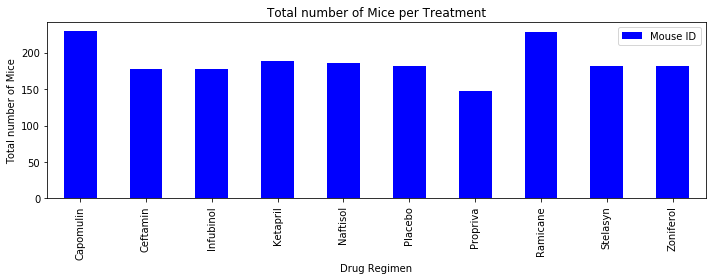

In [126]:
pandas_mice_treatment.plot(kind = "bar",  color = "blue", figsize = (10, 4))
# pandas_mice_treatment.set_ylabel("Total number of Mice")

plt.title("Total number of Mice per Treatment")
plt.ylabel("Total number of Mice")
plt.tight_layout()
plt.show()

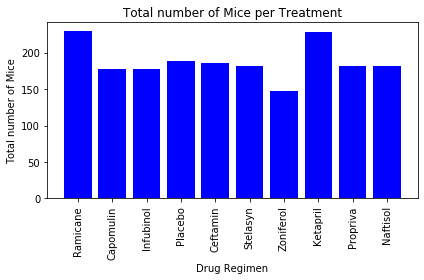

In [155]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# group_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
# unique_treatment = group_mice_treatment.unique()

x_axis = np.arange(0, len(group_mice_treatment))
x_axis


tick_name = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']



plt.bar(x_axis, new_mice_treatment["Mouse ID"], color = "blue", align = "center")
plt.xticks(x_axis, tick_name, rotation = "vertical")
# plt.figure(figsize=(10,4))
plt.title("Total number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.tight_layout()
plt.show()

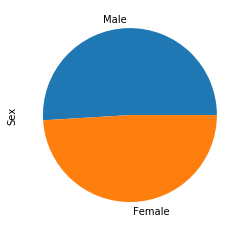

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


male_female_mice = clean_df["Sex"].value_counts()
male_female_mice.plot(kind = "pie")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
